# Importing Libraries and Loading Data

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import *
from keras.models import *
from keras.datasets import imdb

2024-02-03 22:43:11.152505: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-03 22:43:11.152724: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-03 22:43:11.322643: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
(train_x,train_y),(test_x,test_y)=imdb.load_data(num_words=1000)

17464789/17464789 [==============================] - 0s 0us/step


In [7]:
print('review =',train_x[1])
print("label =",train_y[1])

review = [1, 194, 2, 194, 2, 78, 228, 5, 6, 2, 2, 2, 134, 26, 4, 715, 8, 118, 2, 14, 394, 20, 13, 119, 954, 189, 102, 5, 207, 110, 2, 21, 14, 69, 188, 8, 30, 23, 7, 4, 249, 126, 93, 4, 114, 9, 2, 2, 5, 647, 4, 116, 9, 35, 2, 4, 229, 9, 340, 2, 4, 118, 9, 4, 130, 2, 19, 4, 2, 5, 89, 29, 952, 46, 37, 4, 455, 9, 45, 43, 38, 2, 2, 398, 4, 2, 26, 2, 5, 163, 11, 2, 2, 4, 2, 9, 194, 775, 7, 2, 2, 349, 2, 148, 605, 2, 2, 15, 123, 125, 68, 2, 2, 15, 349, 165, 2, 98, 5, 4, 228, 9, 43, 2, 2, 15, 299, 120, 5, 120, 174, 11, 220, 175, 136, 50, 9, 2, 228, 2, 5, 2, 656, 245, 2, 5, 4, 2, 131, 152, 491, 18, 2, 32, 2, 2, 14, 9, 6, 371, 78, 22, 625, 64, 2, 9, 8, 168, 145, 23, 4, 2, 15, 16, 4, 2, 5, 28, 6, 52, 154, 462, 33, 89, 78, 285, 16, 145, 95]
label = 0


In [5]:
train_y[1]

0

In [43]:
vocabulary=imdb.get_word_index()


In [18]:
from keras.preprocessing import sequence
maximum_words=500
train_x=sequence.pad_sequences(train_x,maxlen=maximum_words, padding="pre")
test_x=sequence.pad_sequences(test_x,maxlen=maximum_words, padding="pre")

In [19]:
train_x[1]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [20]:
train_y[1]

0

# RECURRENT NEURAL NETWORK

![](https://images.datacamp.com/image/upload/v1647442110/image6_f6vds6.png)**The SimpleRNN model consists of an embedding layer with an input vocabulary size of 1000 and an embedding size of 32. It is followed by three SimpleRNN layers with decreasing units (100, 50, 25). The final layer is a Dense layer with a sigmoid activation function.**

In [22]:
embedding_size=32
model=Sequential()
model.add(Embedding(1000,embedding_size,input_length=maximum_words))
model.add(SimpleRNN(100,return_sequences='True'))
model.add(SimpleRNN(50,return_sequences='True'))
model.add(SimpleRNN(25))
model.add(Dense(1,activation='sigmoid'))

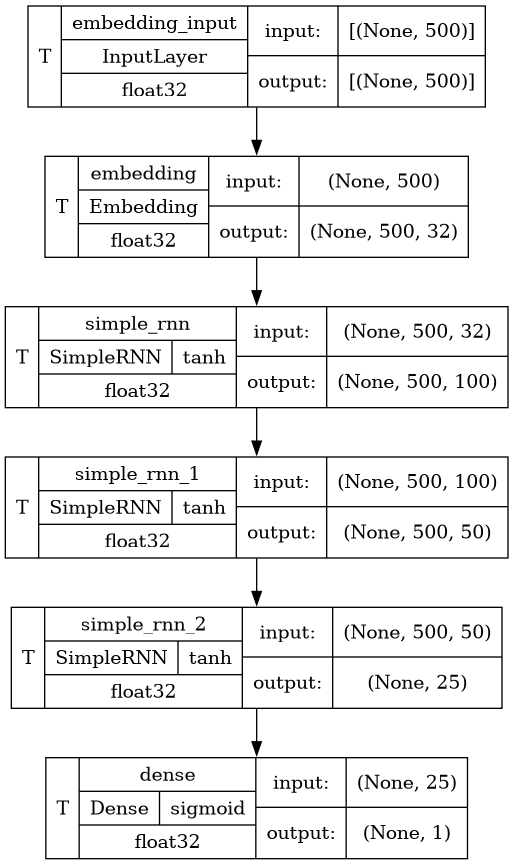

In [24]:
from keras.utils import plot_model
plot_model(model,show_shapes=True, show_dtype=True, show_layer_names=True, show_layer_activations=True, show_trainable=True)

# Training SimpleRNN Model

In [25]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [29]:
history=model.fit(train_x,train_y,epochs=10,batch_size=128,validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 109s 668ms/step - loss: 0.6995 - accuracy: 0.5221 - val_loss: 0.6754 - val_accuracy: 0.5666
Epoch 2/10
157/157 [==============================] - 104s 664ms/step - loss: 0.6518 - accuracy: 0.6212 - val_loss: 0.6465 - val_accuracy: 0.5964
Epoch 3/10
157/157 [==============================] - 104s 663ms/step - loss: 0.5462 - accuracy: 0.7322 - val_loss: 0.5476 - val_accuracy: 0.7220
Epoch 4/10
157/157 [==============================] - 100s 637ms/step - loss: 0.5227 - accuracy: 0.7492 - val_loss: 0.7407 - val_accuracy: 0.5644
Epoch 5/10
157/157 [==============================] - 99s 633ms/step - loss: 0.5620 - accuracy: 0.7088 - val_loss: 0.5997 - val_accuracy: 0.7112
Epoch 6/10
157/157 [==============================] - 100s 638ms/step - loss: 0.4889 - accuracy: 0.7794 - val_loss: 0.5602 - val_accuracy: 0.7096
Epoch 7/10
157/157 [==============================] - 103s 657ms/step - loss: 0.5473 - accuracy: 0.7382 - val_loss: 0.5674 - 

# GATED RECURRENT UNIT

![](https://miro.medium.com/v2/resize:fit:1194/1*B0q2ZLsUUw31eEImeVf3PQ.png)**The GRU model has a similar architecture to the SimpleRNN model. It starts with an embedding layer, followed by three GRU layers (100, 50, 25 units). The output layer is a Dense layer with a sigmoid activation function.**


In [30]:
embedding_size=32
model2=Sequential()
model2.add(Embedding(1000,embedding_size,input_length=maximum_words))
model2.add(GRU(100,return_sequences='True'))
model2.add(GRU(50,return_sequences='True'))
model2.add(GRU(25))
model2.add(Dense(1,activation='sigmoid'))

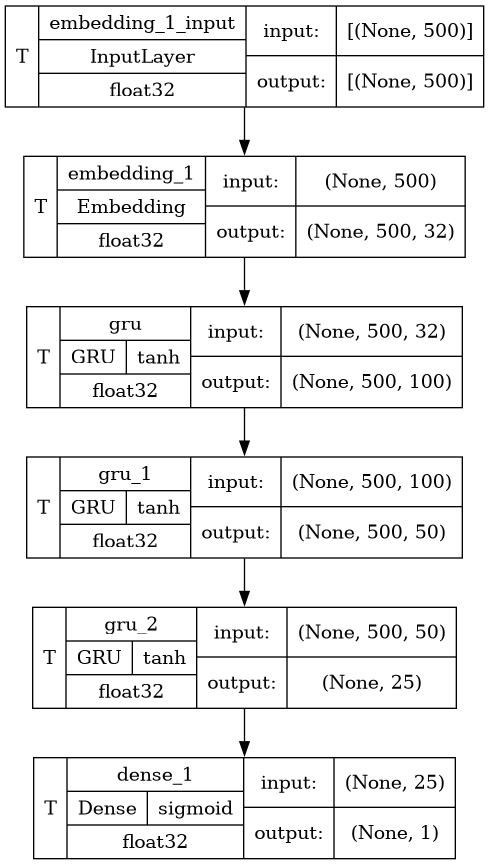

In [37]:
from keras.utils import plot_model

plot_model(
    model2,
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    show_layer_activations=True,
    show_trainable=True
)


# Training GRU Model

In [38]:
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [39]:
history2=model.fit(train_x,train_y,epochs=10,batch_size=128,validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 100s 640ms/step - loss: 0.4717 - accuracy: 0.7857 - val_loss: 0.4975 - val_accuracy: 0.7752
Epoch 2/10
157/157 [==============================] - 100s 637ms/step - loss: 0.4959 - accuracy: 0.7663 - val_loss: 0.5612 - val_accuracy: 0.7082
Epoch 3/10
157/157 [==============================] - 100s 639ms/step - loss: 0.5754 - accuracy: 0.6744 - val_loss: 0.6906 - val_accuracy: 0.5200
Epoch 4/10
157/157 [==============================] - 101s 644ms/step - loss: 0.6690 - accuracy: 0.6236 - val_loss: 0.6471 - val_accuracy: 0.6656
Epoch 5/10
157/157 [==============================] - 100s 637ms/step - loss: 0.5959 - accuracy: 0.6891 - val_loss: 0.5256 - val_accuracy: 0.7468
Epoch 6/10
157/157 [==============================] - 100s 636ms/step - loss: 0.5951 - accuracy: 0.6730 - val_loss: 0.6653 - val_accuracy: 0.6142
Epoch 7/10
157/157 [==============================] - 100s 640ms/step - loss: 0.6027 - accuracy: 0.6776 - val_loss: 0.5679 -

# Visualizing Embeddings

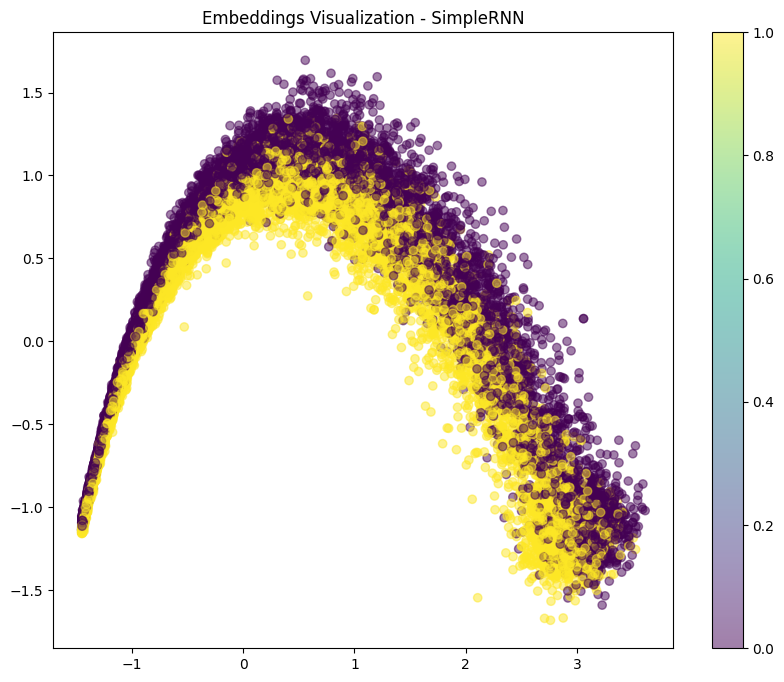

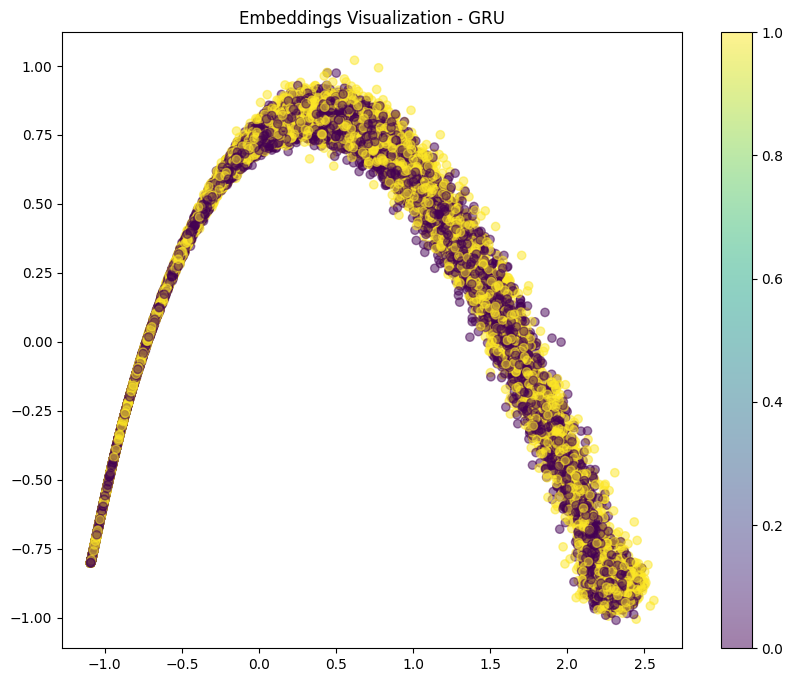

In [47]:
def plot_embeddings(embeddings, title):
    embeddings_2d = embeddings.reshape((embeddings.shape[0], -1))
    pca = PCA(n_components=2)
    embeddings_pca = pca.fit_transform(embeddings_2d)
    plt.figure(figsize=(10, 8))
    plt.scatter(embeddings_pca[:, 0], embeddings_pca[:, 1], c=test_y, cmap='viridis', alpha=0.5)
    plt.title(title)
    plt.colorbar()
    plt.show()
plot_embeddings(embedding_output_simple_rnn, 'Embeddings Visualization - SimpleRNN')
plot_embeddings(embedding_output_gru, 'Embeddings Visualization - GRU')


# Plotting Performance Comparison

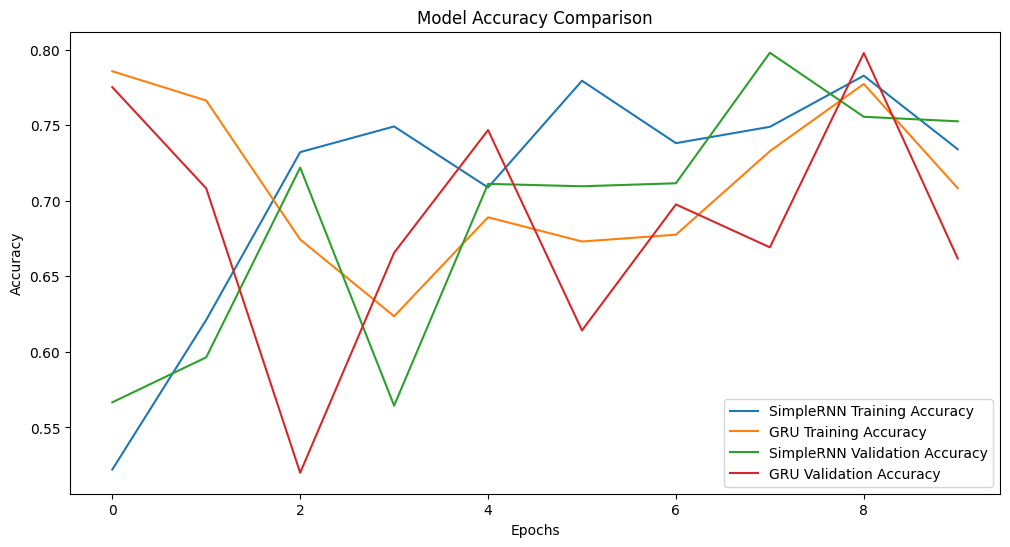

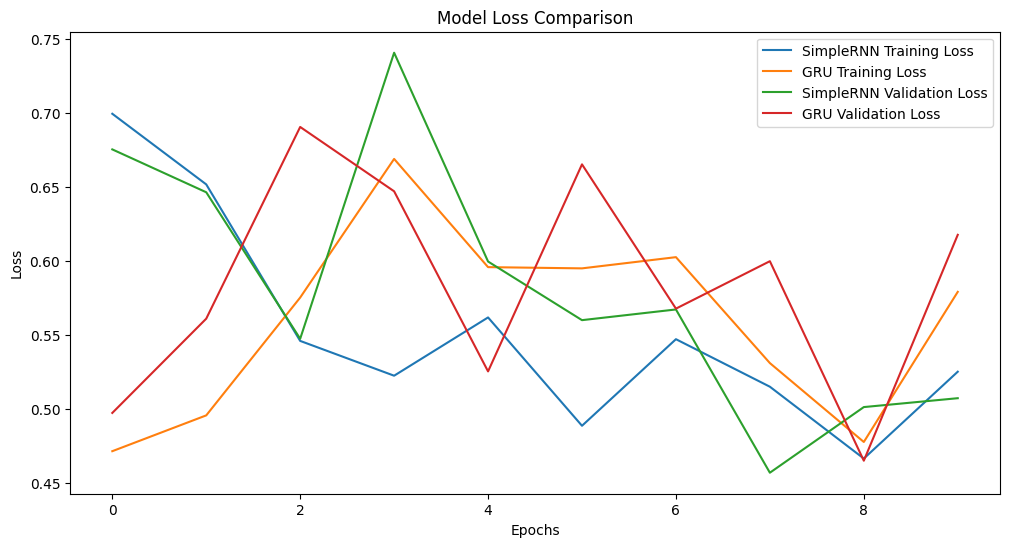

In [42]:
import matplotlib.pyplot as plt
# Plotting accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='SimpleRNN Training Accuracy')
plt.plot(history2.history['accuracy'], label='GRU Training Accuracy')
plt.plot(history.history['val_accuracy'], label='SimpleRNN Validation Accuracy')
plt.plot(history2.history['val_accuracy'], label='GRU Validation Accuracy')
plt.title('Model Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='SimpleRNN Training Loss')
plt.plot(history2.history['loss'], label='GRU Training Loss')
plt.plot(history.history['val_loss'], label='SimpleRNN Validation Loss')
plt.plot(history2.history['val_loss'], label='GRU Validation Loss')
plt.title('Model Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Confusion Matrix

782/782 [==============================] - 153s 195ms/step


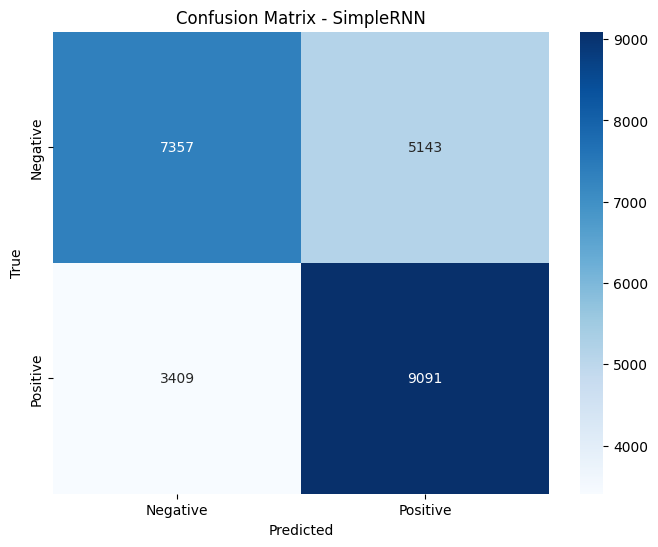

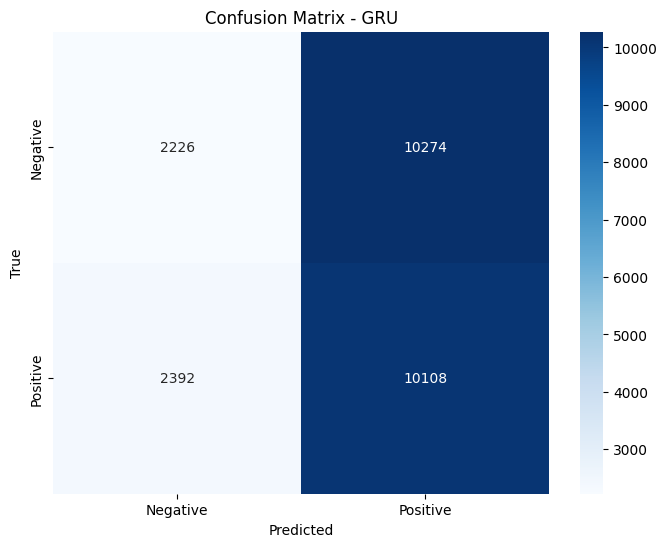

In [44]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predictions for SimpleRNN model
simple_rnn_preds = (model.predict(test_x) > 0.5).astype("int32")

# Predictions for GRU model
gru_preds = (model2.predict(test_x) > 0.5).astype("int32")

# Create confusion matrices
simple_rnn_cm = confusion_matrix(test_y, simple_rnn_preds)
gru_cm = confusion_matrix(test_y, gru_preds)

# Plot confusion matrix for SimpleRNN
plt.figure(figsize=(8, 6))
sns.heatmap(simple_rnn_cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix - SimpleRNN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plot confusion matrix for GRU
plt.figure(figsize=(8, 6))
sns.heatmap(gru_cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix - GRU')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


### Accuracy Comparison
The accuracy comparison plot shows the training and validation accuracy trends for both SimpleRNN and GRU models over the 10 epochs. The legend distinguishes between training and validation accuracies for each model.

### Loss Comparison
The loss comparison plot illustrates the training and validation loss trends for both SimpleRNN and GRU models over the 10 epochs. The legend differentiates between training and validation losses for each model.
# 